## Install pygame and virtual display (needed in Colab)

In [1]:
!pip install pygame
!pip install pyvirtualdisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!apt install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 x11-xkb-utils amd64 7.7+5 [158 kB]
Get:5 http://archive.ubuntu.com/ubunt

In [3]:
from pyvirtualdisplay import Display
Display("xvfb").start()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm.notebook import tqdm, trange
# To build and display animations
from PIL import Image
from IPython import display

## Load Frozen Lake
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

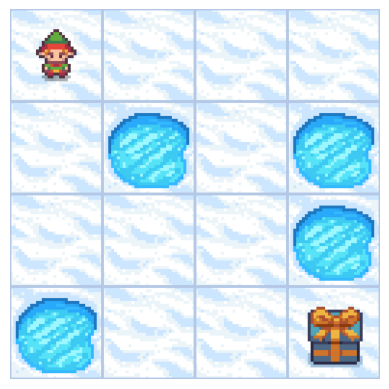

In [5]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", new_step_api=True)
env.reset()
plt.imshow(env.render()[0])
plt.axis('off');
# 0: LEFT, 1: DOWN, 2: RIGHT, 3: UP

## Q-learning
This is plain Q-learning: a table of size states x action that the algorithm learns

In [8]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
learning_rate = .8
gamma = .95
num_episodes = 5000
# create list to contain total rewards
rList = []
for episode in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    # The Q-Table learning algorithm
    for _ in range(100):
        # Choose an action by greedily (with noise) picking from Q table
        a = Q[s,:]
        a = a + np.random.randn(1, env.action_space.n) * (1./(episode+1))
        a = np.argmax(a)
        # Get new state and reward from environment
        s1, reward, terminated, truncated, info = env.step(a)
        # Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + learning_rate * (reward + gamma * np.max(Q[s1,:]) - Q[s,a])
        
        rAll += reward
        s = s1
        if terminated or truncated:
            break

    # break
    rList.append(rAll)

    if (episode+1) % 100 == 0:
        print("Episode %4d, reward %.2f" % (episode+1, sum(rList)/num_episodes))

print("Score over time:", sum(rList)/num_episodes)

Episode  100, reward 0.00
Episode  200, reward 0.00
Episode  300, reward 0.00
Episode  400, reward 0.00
Episode  500, reward 0.01
Episode  600, reward 0.03
Episode  700, reward 0.04
Episode  800, reward 0.05
Episode  900, reward 0.07
Episode 1000, reward 0.08
Episode 1100, reward 0.10
Episode 1200, reward 0.11
Episode 1300, reward 0.13
Episode 1400, reward 0.14
Episode 1500, reward 0.16
Episode 1600, reward 0.17
Episode 1700, reward 0.19
Episode 1800, reward 0.20
Episode 1900, reward 0.22
Episode 2000, reward 0.23
Episode 2100, reward 0.25
Episode 2200, reward 0.26
Episode 2300, reward 0.27
Episode 2400, reward 0.29
Episode 2500, reward 0.30
Episode 2600, reward 0.31
Episode 2700, reward 0.32
Episode 2800, reward 0.34
Episode 2900, reward 0.35
Episode 3000, reward 0.37
Episode 3100, reward 0.38
Episode 3200, reward 0.40
Episode 3300, reward 0.41
Episode 3400, reward 0.43
Episode 3500, reward 0.44
Episode 3600, reward 0.46
Episode 3700, reward 0.47
Episode 3800, reward 0.49
Episode 3900

### This is the learned Q-Matrix

In [9]:
np.round(Q, 4)

array([[2.227e-01, 9.500e-03, 9.500e-03, 8.800e-03],
       [1.000e-04, 2.600e-03, 3.000e-04, 2.236e-01],
       [1.200e-03, 1.900e-03, 0.000e+00, 3.054e-01],
       [8.000e-04, 0.000e+00, 7.000e-04, 9.900e-02],
       [2.766e-01, 1.500e-03, 1.200e-03, 3.000e-04],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.665e-01, 0.000e+00, 3.000e-04, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.500e-03, 3.500e-03, 5.200e-03, 3.367e-01],
       [3.300e-03, 2.579e-01, 0.000e+00, 2.200e-03],
       [7.679e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.400e-03, 5.505e-01, 0.000e+00],
       [0.000e+00, 9.893e-01, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [10]:
# What would be the first move?
moves = {0: 'Left', 1: 'Down', 2: 'Right', 3: 'Up'}
print(Q[0], "=>", moves[np.argmax(Q[0])])

[0.2227136  0.00946279 0.0095029  0.00876959] => Left


#### Exercise: draw in a 4x4 matrix the movements in each state (position)

### Lets play the game!

In [11]:
# Play
state = env.reset()
total_reward = 0
for n in range(100):
    # Choose an action from Q table
    action = np.argmax(Q[state,:])
    # Get new state and reward from environment
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break

imgs = env.render()
print("Episodes", n, "total reward", reward)

Episodes 43 total reward 1.0


### Visualize movements

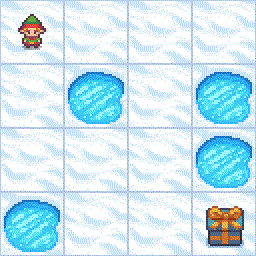

In [12]:
frames = [Image.fromarray(im) for im in imgs]
animation = frames[0]
animation.save("animation.gif", format="GIF", append_images=frames, save_all=True, duration=100)  # in ms
display.Image('animation.gif')

#### Showing all frames

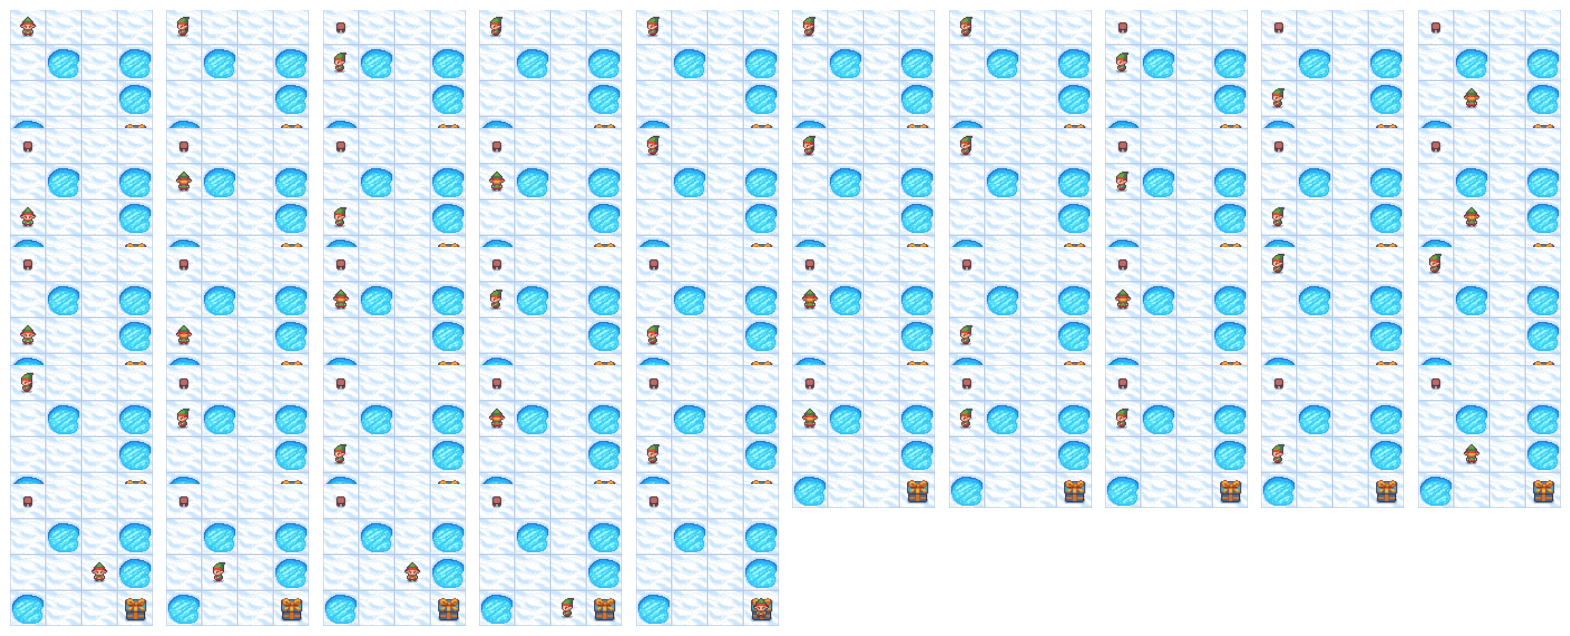

In [13]:
cols = 10
rows = len(imgs) // cols + 1

plt.figure(figsize=(20,10))
for n, im in enumerate(imgs):
    plt.subplot(rows, cols, n+1)
    plt.imshow(im)
    plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=-0.6)

## Now Q-learning in keras / tensorflow
- The idea is to train a network that learns the Q-Matrix
- In general a more sophisticated network will learn the mapping from states to actions
- For this example to work it's important to do not use activaction and initiliaze the network with low values
- The network here is just a states x action matrix, as in plain Q-learning!

In [14]:
import tensorflow as tf
from keras import Model, Sequential
from keras.layers import Dense, Lambda
from keras.optimizers import Adam, SGD

model = Sequential(name="q-learner")
model.add(Dense(4, input_shape=(16,), use_bias=False, activation=None,
          kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))
model.summary()

Model: "q-learner"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


### Training loop
- In Q-learn we update Q using the Bellman equation: $Q(s,a) = Q(s,a) + \alpha(r + \gamma(max(Q(s',a') - Q(s,a))$
- In the neural network we define a cost function $\sum(Q_{target} - Q)^2$, where $Q_{target} = \alpha(r + \gamma(max(Q(s',a')))$

In [15]:
# Set learning parameters
# learning_rate = .8  # for direct gradient descent
learning_rate = 0.1
gamma = .99
epsilon = 0.1
num_episodes = 2000

optimizer = SGD(learning_rate=learning_rate)

# Identity matrix to encode all possible 16 states
idmat = tf.eye(16)
# Create list to contain total rewards
rList = []
rLoss = []
stages = []
for episode in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    # The Q-Network
    for _ in range(100):
        with tf.GradientTape() as tape:
            # Choose an action by greedily (with epsilon chance of random action) from the Q-network
            stages.append(s)
            allQ = model(idmat[s:s+1])
            # sp = tf.argmax(allQ).numpy()[0]
            sp = np.argmax(allQ)
            # if tf.random.normal((1,)) < epsilon:
            if np.random.rand(1) < epsilon:
                sp = env.action_space.sample()
            # Get new state and reward from environment
            s1, reward, terminated, truncated, info = env.step(sp)
            # Obtain the Q' values by feeding the new state through our network
            Q1 = model(idmat[s1:s1+1])
            # Obtain maxQ' and set our target value for chosen action
            targetQ = allQ.numpy()
            targetQ[0, sp] = reward + gamma * np.max(Q1)
            loss = tf.reduce_sum(tf.square(targetQ - allQ))

        grad = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grad, model.trainable_variables))
        # Direct gradient descent
        # w = model.get_weights()
        # w[0] += learning_rate * grad[0]
        # model.set_weights(w)

        rLoss.append(loss.numpy())
        s = s1
        rAll += reward
        if terminated or truncated:
            # Reduce chance of random action as we train the model
            epsilon = 1./((episode/50) + 10)
            break

    rList.append(rAll)
    
    if (episode+1) % 100 == 0:
        print("Episode %4d, loss %.6f, rewards %.2f" %
              (episode+1, loss.numpy(), sum(rList) / (episode+1)))

print("Score over time:", sum(rList)/num_episodes)

Episode  100, loss 0.000000, rewards 0.00
Episode  200, loss 0.001529, rewards 0.01
Episode  300, loss 0.001161, rewards 0.03
Episode  400, loss 0.008991, rewards 0.04
Episode  500, loss 0.056430, rewards 0.05
Episode  600, loss 0.087445, rewards 0.09
Episode  700, loss 0.056832, rewards 0.12
Episode  800, loss 0.189649, rewards 0.15
Episode  900, loss 0.002263, rewards 0.17
Episode 1000, loss 0.014693, rewards 0.18
Episode 1100, loss 0.023497, rewards 0.21
Episode 1200, loss 0.020748, rewards 0.24
Episode 1300, loss 0.111300, rewards 0.25
Episode 1400, loss 0.014699, rewards 0.26
Episode 1500, loss 0.043978, rewards 0.28
Episode 1600, loss 0.029306, rewards 0.30
Episode 1700, loss 0.036394, rewards 0.31
Episode 1800, loss 0.002181, rewards 0.33
Episode 1900, loss 0.035802, rewards 0.34
Episode 2000, loss 0.010476, rewards 0.35
Score over time: 0.3515


### Histogram of visited states during learning

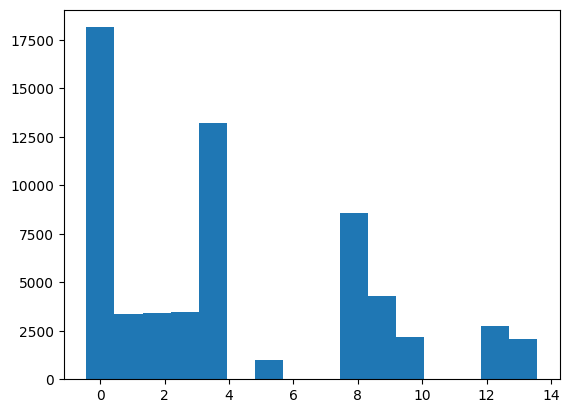

In [16]:
plt.hist(stages, bins=16, align='left');

### Changes in the loss

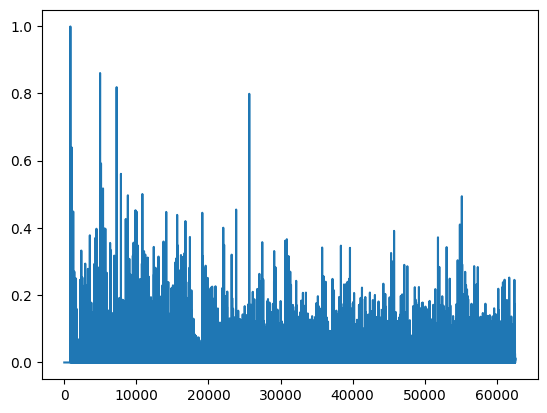

In [17]:
plt.plot(rLoss);

### The learned Q-Matrix

In [18]:
for n, s in enumerate(idmat):
    print(n, model(s[None, ...]).numpy())

0 [[0.5643014  0.46871355 0.48623738 0.4507447 ]]
1 [[0.2601376  0.20310982 0.33082983 0.48194507]]
2 [[0.27713934 0.33995354 0.31967905 0.4354191 ]]
3 [[0.28367534 0.33927137 0.26065993 0.41022176]]
4 [[0.5858579  0.20761414 0.28314635 0.27136844]]
5 [[0.00441151 0.00942789 0.00415052 0.0078161 ]]
6 [[0.3143784  0.07174845 0.12365128 0.02421556]]
7 [[0.0064309  0.00815152 0.0082558  0.00088397]]
8 [[0.227679   0.38699085 0.4772216  0.61405337]]
9 [[0.24048662 0.71625274 0.44810927 0.45188677]]
10 [[0.6381757  0.14506276 0.35631406 0.38451034]]
11 [[0.00463232 0.00965081 0.00466905 0.00936874]]
12 [[0.00962201 0.00997535 0.00148692 0.00439065]]
13 [[0.5501281  0.30021077 0.83511764 0.5124151 ]]
14 [[0.56654245 0.92614716 0.6602312  0.64399   ]]
15 [[0.0057406  0.00811174 0.0001633  0.0014955 ]]


### Evolution of the rewards as the network learns
It can be seen that it earns more rewards as it learns

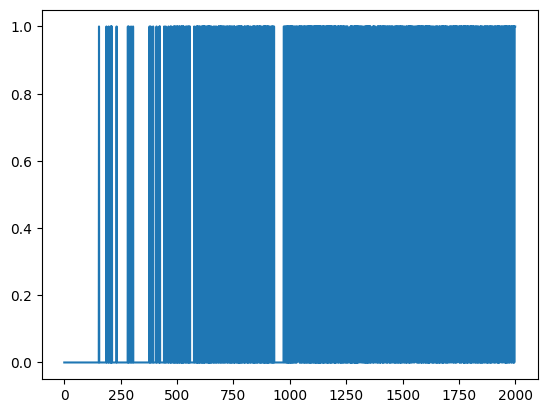

In [19]:
plt.plot(rList);

In [20]:
# Play
state = env.reset()
total_reward = 0
for n in range(100):
    # The model suggests the next action
    action = np.argmax(model(idmat[state:state+1]))
    # Get new state and reward from environment
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break

imgs = env.render()
print("Episodes", n, "total reward", reward)

Episodes 25 total reward 1.0


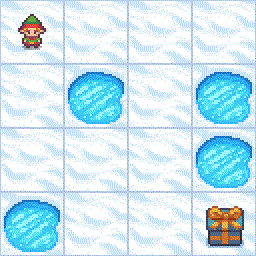

In [21]:
frames = [Image.fromarray(im) for im in imgs]
animation = frames[0]
animation.save("animation.gif", format="GIF", append_images=frames, save_all=True, duration=len(frames)*5)
display.Image('animation.gif')

# Exercices:
1. Try to learn with `is_slippery=False`.
2. Modify the network: use activation (ex. `softmax`), or change the input (for instance provide normalized coordinates `x`, `y`).
3. Solve other problems: [Taxi](https://www.gymlibrary.dev/environments/toy_text/taxi/).

In [22]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", new_step_api=True, is_slippery=False)
env.reset()

0

In [23]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
learning_rate = .8
gamma = .95
num_episodes = 5000
# create list to contain total rewards
rList = []
for episode in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    # The Q-Table learning algorithm
    for _ in range(100):
        # Choose an action by greedily (with noise) picking from Q table
        a = Q[s,:]
        a = a + np.random.randn(1, env.action_space.n) * (1./(episode+1))
        a = np.argmax(a)
        # Get new state and reward from environment
        s1, reward, terminated, truncated, info = env.step(a)
        # Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + learning_rate * (reward + gamma * np.max(Q[s1,:]) - Q[s,a])
        
        rAll += reward
        s = s1
        if terminated or truncated:
            break

    # break
    rList.append(rAll)

    if (episode+1) % 100 == 0:
        print("Episode %4d, reward %.2f" % (episode+1, sum(rList)/num_episodes))

print("Score over time:", sum(rList)/num_episodes)

Episode  100, reward 0.00
Episode  200, reward 0.02
Episode  300, reward 0.04
Episode  400, reward 0.06
Episode  500, reward 0.08
Episode  600, reward 0.10
Episode  700, reward 0.12
Episode  800, reward 0.14
Episode  900, reward 0.16
Episode 1000, reward 0.18
Episode 1100, reward 0.20
Episode 1200, reward 0.22
Episode 1300, reward 0.24
Episode 1400, reward 0.26
Episode 1500, reward 0.28
Episode 1600, reward 0.30
Episode 1700, reward 0.32
Episode 1800, reward 0.34
Episode 1900, reward 0.36
Episode 2000, reward 0.38
Episode 2100, reward 0.40
Episode 2200, reward 0.42
Episode 2300, reward 0.44
Episode 2400, reward 0.46
Episode 2500, reward 0.48
Episode 2600, reward 0.50
Episode 2700, reward 0.52
Episode 2800, reward 0.54
Episode 2900, reward 0.56
Episode 3000, reward 0.58
Episode 3100, reward 0.60
Episode 3200, reward 0.62
Episode 3300, reward 0.64
Episode 3400, reward 0.66
Episode 3500, reward 0.68
Episode 3600, reward 0.70
Episode 3700, reward 0.72
Episode 3800, reward 0.74
Episode 3900

In [24]:
np.round(Q, 4)
# 0: LEFT, 1: DOWN, 2: RIGHT, 3: UP

array([[0.    , 0.    , 0.7738, 0.    ],
       [0.    , 0.    , 0.8145, 0.    ],
       [0.    , 0.8574, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.9025, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.7024, 0.    ],
       [0.    , 0.95  , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [25]:
# What would be the first move?
moves = {0: 'Left', 1: 'Down', 2: 'Right', 3: 'Up'}
print(Q[0], "=>", moves[np.argmax(Q[0])])

[0.         0.         0.77378094 0.        ] => Right


Al haber desactivado *is_slippery*, hemos eliminado la aleatoriedad del problema, en cuanto a que no se ejecute el movimiento deseado, por lo que es lógico que aumente considerablemente la velocidad de convergencia y también aumente la recompensa media que se obtiene. Además, vemos cómo la matriz *Q* tiene muchas filas que son completamente nulas. Esto es debido a que nuestro protagonista **nunca** visita esas posiciones (recordemos que cada celda del tablero es una fila de nuestra matriz), además ahora las filas que no son 0 tienen todas las entradas nulas a excepción de una de ellas que será el movimiento que realice. Al haber eliminado la aleatoriedad, sí que existe un camino óptimo (de hecho existen 2 en este caso) por lo que el modelo aprende, a base de golpes, a realizar ese camino siempre para obtener su recompensa.

-----------------------

In [26]:
model = Sequential(name="q-learner")
model.add(Dense(4, input_shape=(16,), use_bias=False, activation='softmax',
          kernel_initializer=tf.keras.initializers.RandomUniform(0, 0.01)))
model.summary()

Model: "q-learner"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Set learning parameters
# learning_rate = .8  # for direct gradient descent
learning_rate = 0.1
gamma = .99
epsilon = 0.1
num_episodes = 2000

optimizer = SGD(learning_rate=learning_rate)

# Identity matrix to encode all possible 16 states
idmat = tf.eye(16)
# Create list to contain total rewards
rList = []
rLoss = []
stages = []
for episode in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    # The Q-Network
    for _ in range(100):
        with tf.GradientTape() as tape:
            # Choose an action by greedily (with epsilon chance of random action) from the Q-network
            stages.append(s)
            allQ = model(idmat[s:s+1])
            # sp = tf.argmax(allQ).numpy()[0]
            sp = np.argmax(allQ)
            # if tf.random.normal((1,)) < epsilon:
            if np.random.rand(1) < epsilon:
                sp = env.action_space.sample()
            # Get new state and reward from environment
            s1, reward, terminated, truncated, info = env.step(sp)
            # Obtain the Q' values by feeding the new state through our network
            Q1 = model(idmat[s1:s1+1])
            # Obtain maxQ' and set our target value for chosen action
            targetQ = allQ.numpy()
            targetQ[0, sp] = reward + gamma * np.max(Q1)
            loss = tf.reduce_sum(tf.square(targetQ - allQ))

        grad = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grad, model.trainable_variables))
        # Direct gradient descent
        # w = model.get_weights()
        # w[0] += learning_rate * grad[0]
        # model.set_weights(w)

        rLoss.append(loss.numpy())
        s = s1
        rAll += reward
        if terminated or truncated:
            # Reduce chance of random action as we train the model
            epsilon = 1./((episode/50) + 10)
            break

    rList.append(rAll)
    
    if (episode+1) % 100 == 0:
        print("Episode %4d, loss %.6f, rewards %.2f" %
              (episode+1, loss.numpy(), sum(rList) / (episode+1)))

print("Score over time:", sum(rList)/num_episodes)

Episode  100, loss 0.000005, rewards 0.00
Episode  200, loss 0.000002, rewards 0.00
Episode  300, loss 0.000002, rewards 0.00
Episode  400, loss 0.000002, rewards 0.00
Episode  500, loss 0.000003, rewards 0.00
Episode  600, loss 0.000002, rewards 0.00
Episode  700, loss 0.000003, rewards 0.00
Episode  800, loss 0.000002, rewards 0.00
Episode  900, loss 0.000003, rewards 0.00
Episode 1000, loss 0.000002, rewards 0.00
Episode 1100, loss 0.000002, rewards 0.00
Episode 1200, loss 0.000002, rewards 0.00
Episode 1300, loss 0.000002, rewards 0.00
Episode 1400, loss 0.000002, rewards 0.00
Episode 1500, loss 0.000002, rewards 0.00
Episode 1600, loss 0.000002, rewards 0.00
Episode 1700, loss 0.000002, rewards 0.00
Episode 1800, loss 0.000002, rewards 0.00
Episode 1900, loss 0.000003, rewards 0.00
Episode 2000, loss 0.000003, rewards 0.01
Score over time: 0.0105


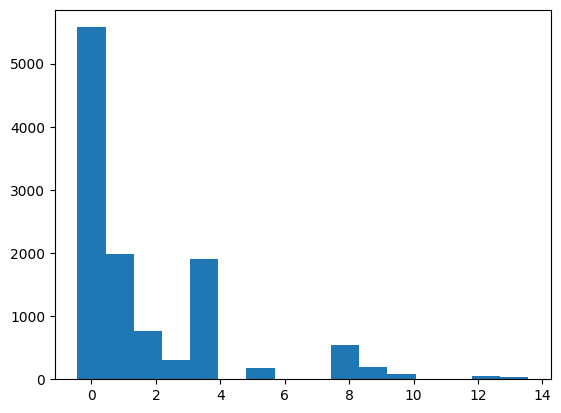

In [28]:
plt.hist(stages, bins=16, align='left');

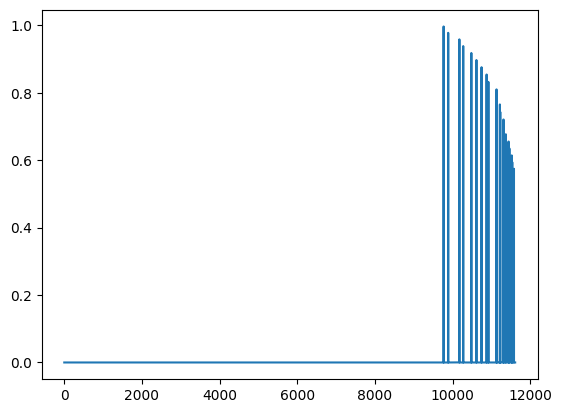

In [29]:
plt.plot(rLoss);

In [30]:
# Play
state = env.reset()
total_reward = 0
for n in range(100):
    # The model suggests the next action
    action = np.argmax(model(idmat[state:state+1]))
    # Get new state and reward from environment
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break

imgs = env.render()
print("Episodes", n, "total reward", reward)

Episodes 99 total reward 0.0


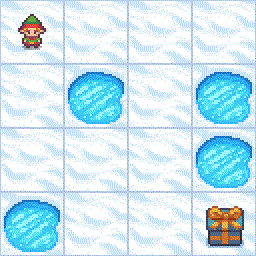

In [31]:
frames = [Image.fromarray(im) for im in imgs]
animation = frames[0]
animation.save("animation.gif", format="GIF", append_images=frames, save_all=True, duration=len(frames)*5)
display.Image('animation.gif')

Como podemos observar, si cambiamos la función de activación a *softmax* la cosa no funciona bien. ¿Por qué ocurre esto?

Recordemos que estamos implementando un algoritmo Q-learning para resolver el problema FrozenLake, que es un problema de aprendizaje por refuerzo con un espacio discreto de acciones.

La activación de la última capa del modelo en `None` permite que la salida de la red neuronal sea un valor real, lo cual es apropiado para problemas de aprendizaje por refuerzo con espacios de acciones discretos. En el algoritmo Q-learning, se utiliza una función de valor llamada función Q, que representa el valor esperado de las recompensas futuras para un estado y una acción específicos. Al permitir que la activación de la última capa sea `None`, la red neuronal puede generar valores reales que representan la estimación del valor Q para cada acción posible en el estado actual. Recalcamos esto: estamos intentando estimar el **Q** que obtendremos si realizamos esa acción.

Si se estableciera la activación de la última capa en *softmax*, esto convertiría las salidas de la red neuronal en una distribución de probabilidad. En lugar de tener valores reales que representen estimaciones del valor Q, tendríamos probabilidades que representan la probabilidad de seleccionar cada acción en el estado actual. Esto podría causar problemas en la actualización del modelo y en la estimación de los valores Q, ya que el algoritmo Q-learning se basa en seleccionar la acción con el valor Q más alto en un estado dado.

Por lo tanto, es importante que la activación de la última capa del modelo Sequential esté fijada en `None` para asegurar que la red neuronal genere valores reales que representen estimaciones del valor Q en el contexto del algoritmo Q-learning y el problema FrozenLake.

---------------------